<a href="https://colab.research.google.com/github/Soptorshi14/CSE413/blob/main/1055_7A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data
customer_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
daily_arrivals = [8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10]

# Create a pandas DataFrame
df = pd.DataFrame({'Customer_ID': customer_ids, 'Daily_Arrivals': daily_arrivals})

# Compute basic statistics
mean_arrivals = df['Daily_Arrivals'].mean()
variance_arrivals_sample = df['Daily_Arrivals'].var()  # Sample variance (n-1 in denominator)
std_dev_arrivals_sample = df['Daily_Arrivals'].std()  # Sample standard deviation

# Population variance (N in denominator)
# For a small dataset like this, we can assume it's a sample of a larger population.
# If we were certain this was the entire population, we would use:
# variance_arrivals_population = df['Daily_Arrivals'].var(ddof=0)
# std_dev_arrivals_population = df['Daily_Arrivals'].std(ddof=0)

print(f"Mean Daily Arrivals: {mean_arrivals:.2f}")
print(f"Sample Variance of Daily Arrivals: {variance_arrivals_sample:.2f}")
print(f"Sample Standard Deviation of Daily Arrivals: {std_dev_arrivals_sample:.2f}")

# Explanation of population vs. sample variance:
# Population variance measures the spread of data for an entire population.
# Sample variance measures the spread of data for a sample taken from a population.
# The key difference is the denominator in the calculation:
# - Population variance uses N (the total number of data points in the population).
# - Sample variance uses n-1 (where n is the number of data points in the sample).
# Using n-1 in the sample variance (Bessel's correction) provides a less biased estimate
# of the true population variance, especially for smaller samples.

Mean Daily Arrivals: 11.45
Sample Variance of Daily Arrivals: 6.68
Sample Standard Deviation of Daily Arrivals: 2.58


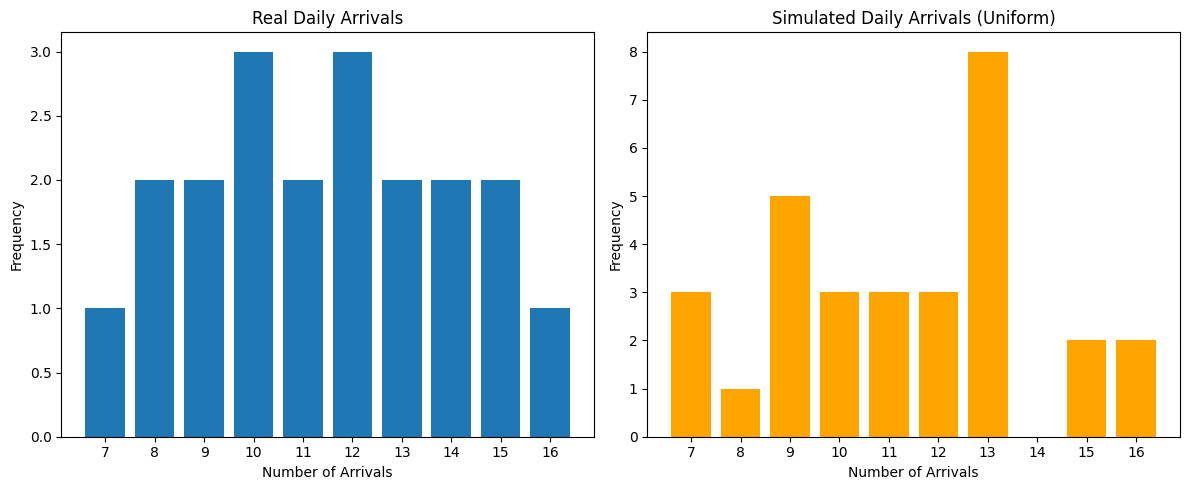

In [3]:
# Assume customer arrivals follow a uniform distribution based on the range of daily_arrivals
min_arrivals = min(daily_arrivals)
max_arrivals = max(daily_arrivals)

# Generate simulated data for 30 days using a uniform distribution
simulated_arrivals_uniform = np.random.uniform(low=min_arrivals, high=max_arrivals, size=30)

# Round simulated data to the nearest integer since arrivals are discrete
simulated_arrivals_uniform = np.round(simulated_arrivals_uniform).astype(int)

# Create a DataFrame for simulated data (optional, but good for consistency)
df_simulated_uniform = pd.DataFrame({'Simulated_Daily_Arrivals_Uniform': simulated_arrivals_uniform})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of real data
axes[0].hist(df['Daily_Arrivals'], bins=range(min_arrivals, max_arrivals + 2), align='left', rwidth=0.8)
axes[0].set_title('Real Daily Arrivals')
axes[0].set_xlabel('Number of Arrivals')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(min_arrivals, max_arrivals + 1))

# Histogram of simulated data (uniform distribution)
axes[1].hist(df_simulated_uniform['Simulated_Daily_Arrivals_Uniform'], bins=range(min_arrivals, max_arrivals + 2), align='left', rwidth=0.8, color='orange')
axes[1].set_title('Simulated Daily Arrivals (Uniform)')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(min_arrivals, max_arrivals + 1))

plt.tight_layout()
plt.show()

In [4]:
# Monte Carlo Simulation
num_simulations = 100000

# Generate simulated data using a uniform distribution for the Monte Carlo simulation
# We use the same min/max derived from the real data
simulated_arrivals_mc = np.random.uniform(low=min_arrivals, high=max_arrivals, size=num_simulations)

# Round simulated data to the nearest integer
simulated_arrivals_mc = np.round(simulated_arrivals_mc).astype(int)

# Count the number of days with more than 15 arrivals
days_with_more_than_15 = np.sum(simulated_arrivals_mc > 15)

# Estimate the probability
probability_more_than_15 = days_with_more_than_15 / num_simulations

print(f"Estimated probability of more than 15 arrivals (using uniform distribution): {probability_more_than_15:.4f}")

Estimated probability of more than 15 arrivals (using uniform distribution): 0.0559


Your unique hypothesized mean: 15

T-statistic: -6.1419
P-value: 0.0000

Conclusion (at alpha = 0.05): Reject the null hypothesis. There is sufficient evidence to suggest that the true mean daily customer arrival is different from the hypothesized mean.


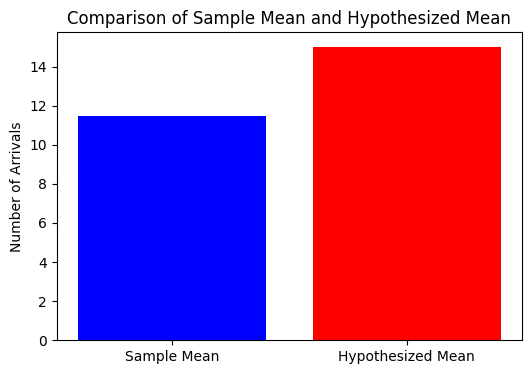


Interpretation:
The one-sample t-test was conducted to determine if the average daily customer arrivals differ significantly from your unique hypothesized mean of 15.00.
The calculated p-value (0.0000) indicates the probability of observing the sample data (or more extreme data) if the null hypothesis (mean daily arrivals equals 15.00) were true.
Since the p-value (0.0000) is less than the significance level (alpha = 0.05), we reject the null hypothesis.
This suggests that there is a statistically significant difference between the sample mean (11.45) and your hypothesized mean (15.00).


In [7]:
# Hypothesis Testing

# IMPORTANT: Replace YOUR_STUDENT_ID with your actual student ID
student_id = 1055 # Replace with your Student ID

# Calculate unique hypothesized mean
hypothesized_mean = (student_id % 1000 % 10) + 10
print(f"Your unique hypothesized mean: {hypothesized_mean}")

# Perform one-sample t-test
# The null hypothesis is that the true mean is equal to the hypothesized mean
t_statistic, p_value = stats.ttest_1samp(df['Daily_Arrivals'], hypothesized_mean)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is sufficient evidence to suggest that the true mean daily customer arrival is different from the hypothesized mean."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to suggest that the true mean daily customer arrival is different from the hypothesized mean."

print(f"\nConclusion (at alpha = {alpha}): {conclusion}")

# Visualization comparing sample mean and hypothesized mean
plt.figure(figsize=(6, 4))
plt.bar(['Sample Mean', 'Hypothesized Mean'], [mean_arrivals, hypothesized_mean], color=['blue', 'red'])
plt.ylabel('Number of Arrivals')
plt.title('Comparison of Sample Mean and Hypothesized Mean')
plt.show()

# Interpretation
print("\nInterpretation:")
print(f"The one-sample t-test was conducted to determine if the average daily customer arrivals differ significantly from your unique hypothesized mean of {hypothesized_mean:.2f}.")
print(f"The calculated p-value ({p_value:.4f}) indicates the probability of observing the sample data (or more extreme data) if the null hypothesis (mean daily arrivals equals {hypothesized_mean:.2f}) were true.")

if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level (alpha = {alpha}), we reject the null hypothesis.")
    print(f"This suggests that there is a statistically significant difference between the sample mean ({mean_arrivals:.2f}) and your hypothesized mean ({hypothesized_mean:.2f}).")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to the significance level (alpha = {alpha}), we fail to reject the null hypothesis.")
    print(f"This suggests that there is not enough statistical evidence to conclude that the true mean daily customer arrival is different from your hypothesized mean ({hypothesized_mean:.2f}). The observed difference between the sample mean ({mean_arrivals:.2f}) and the hypothesized mean could reasonably occur by random chance if the null hypothesis were true.")